In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Pregnancies: Number of times pregnant
# Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
# BloodPressure: Diastolic blood pressure (mm Hg)
# SkinThickness: Triceps skin fold thickness (mm)
# Insulin: 2-Hour serum insulin (mu U/ml)
# BMI: Body mass index (weight in kg/(height in m)^2)
# DiabetesPedigreeFunction: Diabetes pedigree function
# Age: Age (years)
# Outcome: Class variable (0 or 1)

In [3]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# pandas profiling for EDA 
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df, title='Diabetes Report', explorative=True)
# profile.to_html()

In [5]:
#profile

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

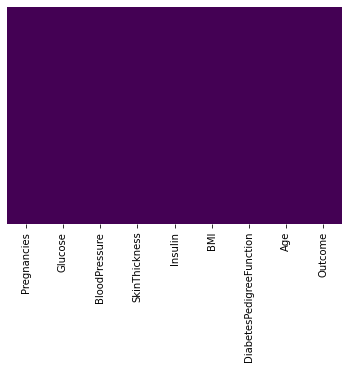

In [8]:
#heatmap for null values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
df.isnull().sum()

In [9]:
df_copy = df.copy(deep=True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [10]:
df_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

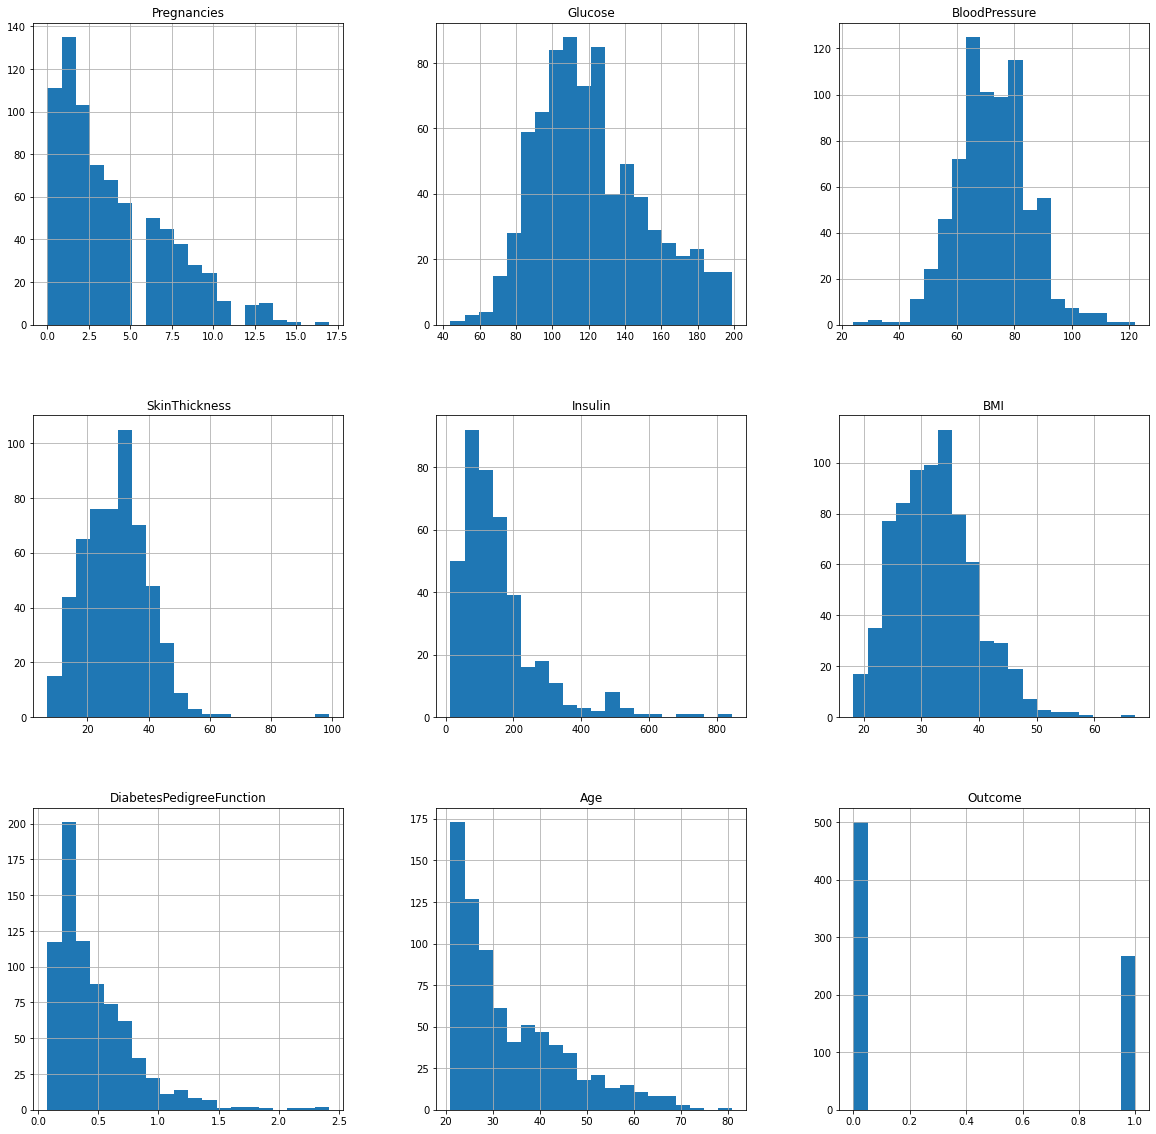

In [11]:
#hist all columns with more detailed
df_copy.hist(figsize=(20,20), bins=20)

In [12]:
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)

In [13]:
labels = ['Not Diabetic', 'Diabetic']
values = df_copy['Outcome'].value_counts()
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.5)])
fig.update_layout(title_text='Diabetic vs Not Diabetic', title_x=0.5)
fig.show()

fig = px.histogram(df_copy, x="Outcome", color="Outcome", title="Diabetic vs Not Diabetic")
fig.show()

<AxesSubplot:xlabel='Age', ylabel='Density'>

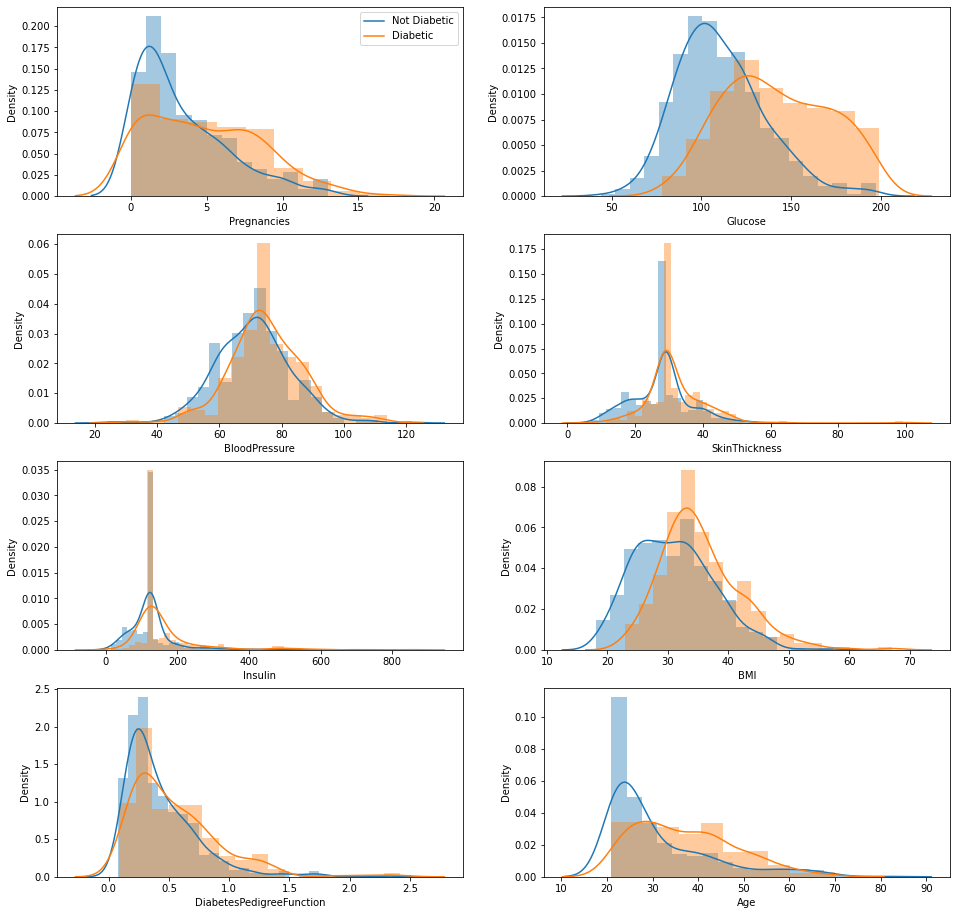

In [14]:
fig, axes = plt.subplots(4, 2, figsize=(16, 16))
sns.distplot(df_copy[df_copy['Outcome'] == 0]['Pregnancies'], ax=axes[0, 0])
sns.distplot(df_copy[df_copy['Outcome'] == 1]['Pregnancies'], ax=axes[0, 0])
axes[0,0].legend(['Not Diabetic', 'Diabetic'])

sns.distplot(df_copy[df_copy['Outcome'] == 0]['Glucose'], ax=axes[0, 1])
sns.distplot(df_copy[df_copy['Outcome'] == 1]['Glucose'], ax=axes[0, 1])

sns.distplot(df_copy[df_copy['Outcome'] == 0]['BloodPressure'], ax=axes[1, 0])
sns.distplot(df_copy[df_copy['Outcome'] == 1]['BloodPressure'], ax=axes[1, 0])

sns.distplot(df_copy[df_copy['Outcome'] == 0]['SkinThickness'], ax=axes[1, 1])
sns.distplot(df_copy[df_copy['Outcome'] == 1]['SkinThickness'], ax=axes[1, 1])

sns.distplot(df_copy[df_copy['Outcome'] == 0]['Insulin'], ax=axes[2, 0])
sns.distplot(df_copy[df_copy['Outcome'] == 1]['Insulin'], ax=axes[2, 0])

sns.distplot(df_copy[df_copy['Outcome'] == 0]['BMI'], ax=axes[2, 1])
sns.distplot(df_copy[df_copy['Outcome'] == 1]['BMI'], ax=axes[2, 1])

sns.distplot(df_copy[df_copy['Outcome'] == 0]['DiabetesPedigreeFunction'], ax=axes[3, 0])
sns.distplot(df_copy[df_copy['Outcome'] == 1]['DiabetesPedigreeFunction'], ax=axes[3, 0])

sns.distplot(df_copy[df_copy['Outcome'] == 0]['Age'], ax=axes[3, 1])
sns.distplot(df_copy[df_copy['Outcome'] == 1]['Age'], ax=axes[3, 1])


<AxesSubplot:>

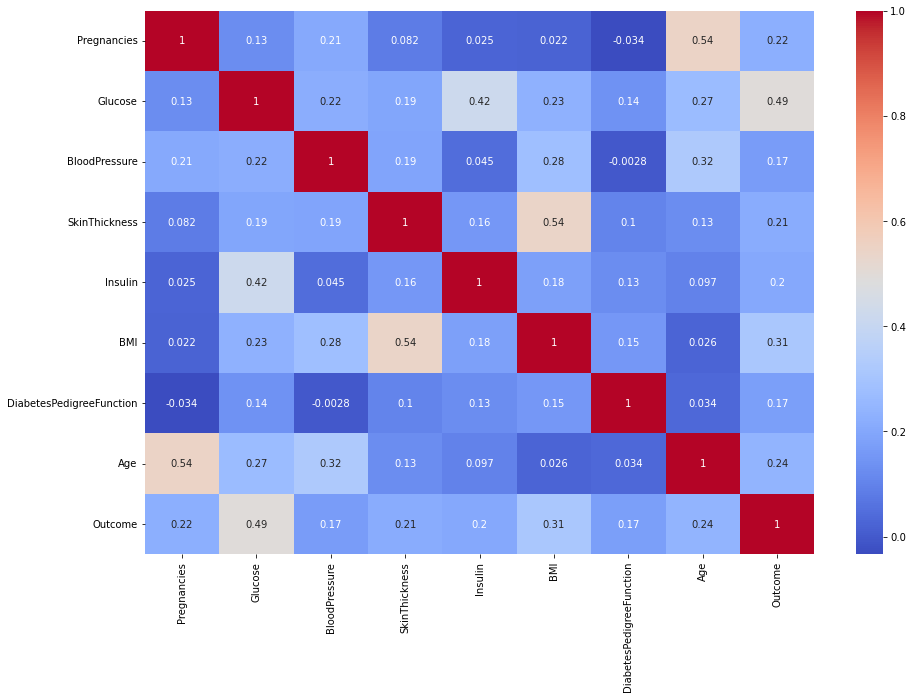

In [15]:
corr = df_copy.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

<AxesSubplot:>

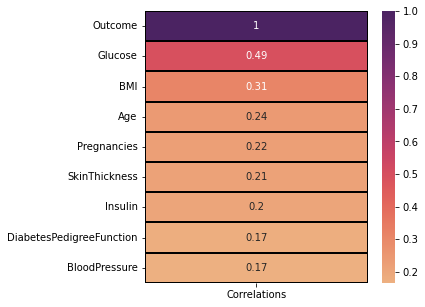

In [16]:
corr = df_copy.corrwith(df_copy['Outcome']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,linewidths = 0.4,linecolor = 'black',cmap="flare")

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [18]:
#ANOVA TEST
X = df_copy.iloc[:,0:8]  #independent columns
y = df_copy.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_classif, k=8)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
featureScores = featureScores.sort_values(by='Score', ascending=False)
featureScores

,Features,Score
1,Glucose,245.859209
5,BMI,82.629271
7,Age,46.140611
0,Pregnancies,39.670227
3,SkinThickness,37.078538
4,Insulin,33.190796
6,DiabetesPedigreeFunction,23.871300
2,BloodPressure,21.725844


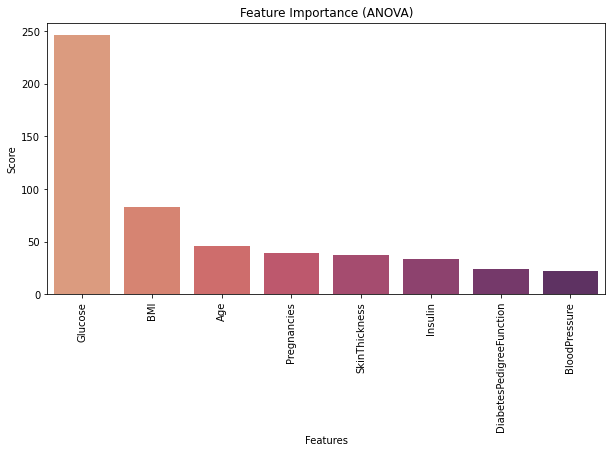

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(x='Features', y='Score', data=featureScores, palette='flare')
plt.xticks(rotation=90)
plt.title('Feature Importance (ANOVA)')
plt.show()

## Model Creating

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
def model(classifier,x_train,y_train,x_test,y_test):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    plot_roc_curve(classifier, x_test,y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

In [23]:
def model_evaluation(classifier,x_test,y_test):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

In [24]:
from xgboost import XGBClassifier
from xgboost import plot_importance


xgb = XGBClassifier()

In [25]:
param_grid = {'n_estimators': [50, 100, 200, 300, 400, 500],
                'max_depth': [1, 2, 3, 4, 5],
                'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
                'eval_metric': ["auc"]
                }
grid = GridSearchCV(xgb, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_

In [26]:
best_params = grid.best_params_
best_score = grid.best_score_

In [27]:
xgb_best = XGBClassifier(**best_params)
xgb_best.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=1, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

              precision    recall  f1-score   support

           0       0.80      0.83      0.82        99
           1       0.67      0.64      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154



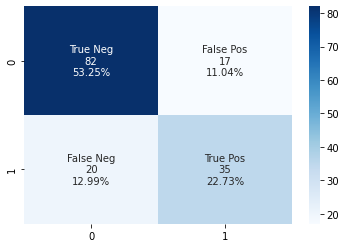

In [28]:
# Model Evaluation
model_evaluation(xgb_best, x_test, y_test)

Cross Validation Score :  85.15%
ROC_AUC Score :  73.23%


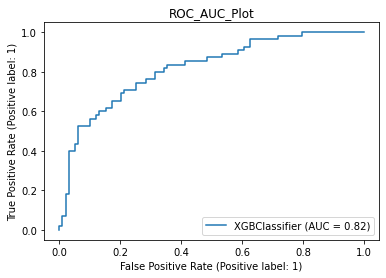

In [29]:
#roc_auc_score
model(xgb_best,x_train,y_train,x_test,y_test)

### xgb optimization with optuna

In [30]:
import optuna

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 1, 8),
        'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'eval_metric': "auc",
    }

    optuna_model = XGBClassifier(**params)

    optuna_model.fit(x_train, y_train)

    y_pred = optuna_model.predict(x_test)

    return roc_auc_score(y_test, y_pred)

In [31]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=500)

print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

[I 2023-07-09 22:01:51,786] A new study created in memory with name: no-name-fade6c9a-b8a4-45b1-ab8a-a45da4735599
[I 2023-07-09 22:01:51,855] Trial 0 finished with value: 0.5 and parameters: {'n_estimators': 68, 'max_depth': 1, 'learning_rate': 0.53452940807207, 'min_child_weight': 7, 'gamma': 1.0341915211327908e-08, 'subsample': 0.020902408261394535, 'colsample_bytree': 0.24457961378898846, 'reg_alpha': 0.0023310681247715286, 'reg_lambda': 1.3168682513183541e-06}. Best is trial 0 with value: 0.5.
[I 2023-07-09 22:01:52,029] Trial 1 finished with value: 0.5 and parameters: {'n_estimators': 228, 'max_depth': 5, 'learning_rate': 0.6259889038188527, 'min_child_weight': 10, 'gamma': 0.5099133231461456, 'subsample': 0.01163975622263538, 'colsample_bytree': 0.3006901296240036, 'reg_alpha': 1.4862380548413037e-05, 'reg_lambda': 6.446601725540819e-05}. Best is trial 0 with value: 0.5.
[I 2023-07-09 22:01:52,103] Trial 2 finished with value: 0.7484848484848485 and parameters: {'n_estimators': 5

Number of finished trials: 500
Best trial:
  Value: 0.797979797979798
  Params: 
    n_estimators: 217
    max_depth: 2
    learning_rate: 0.08322895676173515
    min_child_weight: 7
    gamma: 0.25538181049433545
    subsample: 0.3032450314050945
    colsample_bytree: 0.024369983778437385
    reg_alpha: 1.5749258132811373e-07
    reg_lambda: 0.004792988530433329


In [32]:
params = trial.params

optuna_xgb = XGBClassifier(**params)
optuna_xgb.fit(x_train, y_train)

[22:04:32] WARNING: C:\Users\dev-admin\croot\xgboost-split_1675120659361\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.024369983778437385,
              enable_categorical=False, gamma=0.25538181049433545, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.08322895676173515, max_delta_step=0, max_depth=2,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=217, n_jobs=12, num_parallel_tree=1,
              predictor='auto', random_state=0,
              reg_alpha=1.5749258132811373e-07, reg_lambda=0.004792988530433329,
              scale_pos_weight=1, subsample=0.3032450314050945,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [33]:
optuna_xgb_pred = optuna_xgb.predict(x_test)

In [34]:
optuna.visualization.plot_param_importances(study)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        99
           1       0.75      0.73      0.74        55

    accuracy                           0.82       154
   macro avg       0.80      0.80      0.80       154
weighted avg       0.82      0.82      0.82       154



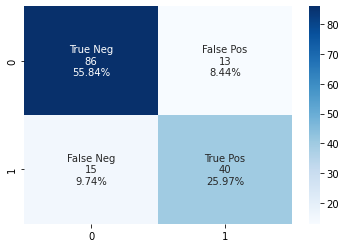

In [35]:
model_evaluation(optuna_xgb, x_test, y_test)

[22:05:05] WARNING: C:\Users\dev-admin\croot\xgboost-split_1675120659361\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[22:05:05] WARNING: C:\Users\dev-admin\croot\xgboost-split_1675120659361\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:05:06] WARNING: C:\Users\dev-admin\croot\xgboost-split_1675120659361\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:05:06] WARNING: C:\Users\dev-admin\croot\xgboost-split_1675120659361\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:05:06] WARNING: C:\Users\dev-admin\croot\xgboost-split_1675120659361\work\s

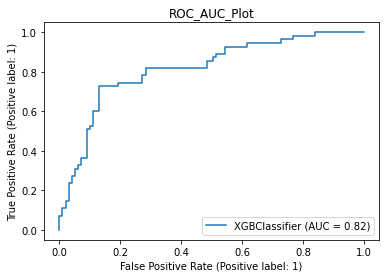

In [36]:
model(optuna_xgb,x_train,y_train,x_test,y_test)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

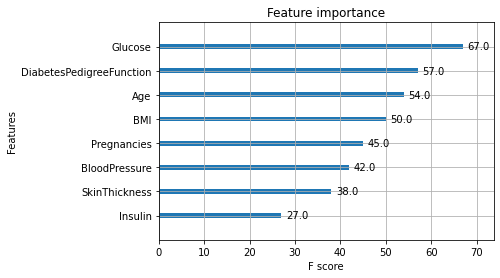

In [37]:
plot_importance(optuna_xgb)

### comparing gridsearchcv and optuna

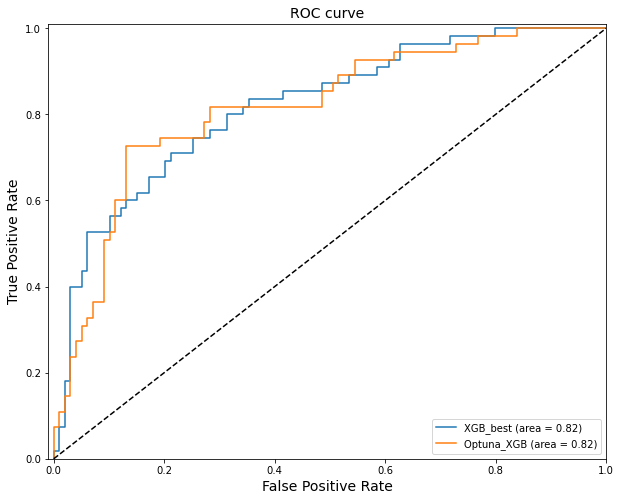

In [38]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Compute ROC curve and AUC for XGB_best
fpr_xgb_best, tpr_xgb_best, thresholds_xgb_best = roc_curve(y_test, xgb_best.predict_proba(x_test)[:, 1])
auc_xgb_best = auc(fpr_xgb_best, tpr_xgb_best)

# Compute ROC curve and AUC for Optuna_XGB
fpr_optuna_xgb, tpr_optuna_xgb, thresholds_optuna_xgb = roc_curve(y_test, optuna_xgb.predict_proba(x_test)[:, 1])
auc_optuna_xgb = auc(fpr_optuna_xgb, tpr_optuna_xgb)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_xgb_best, tpr_xgb_best, label='XGB_best (area = %0.2f)' % auc_xgb_best)
plt.plot(fpr_optuna_xgb, tpr_optuna_xgb, label='Optuna_XGB (area = %0.2f)' % auc_optuna_xgb)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC curve', fontsize=14)
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.80      0.83      0.82        99
           1       0.67      0.64      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154



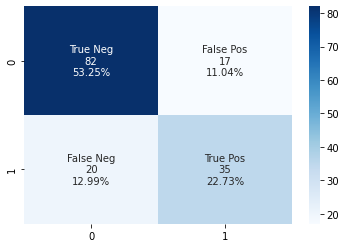

In [39]:
model_evaluation(xgb_best, x_test, y_test)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        99
           1       0.75      0.73      0.74        55

    accuracy                           0.82       154
   macro avg       0.80      0.80      0.80       154
weighted avg       0.82      0.82      0.82       154



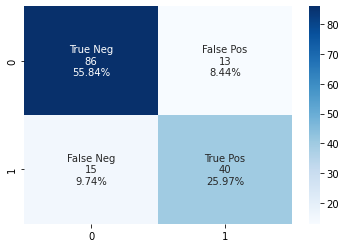

In [40]:
model_evaluation(optuna_xgb, x_test, y_test)

### what if we exclude outlier values?

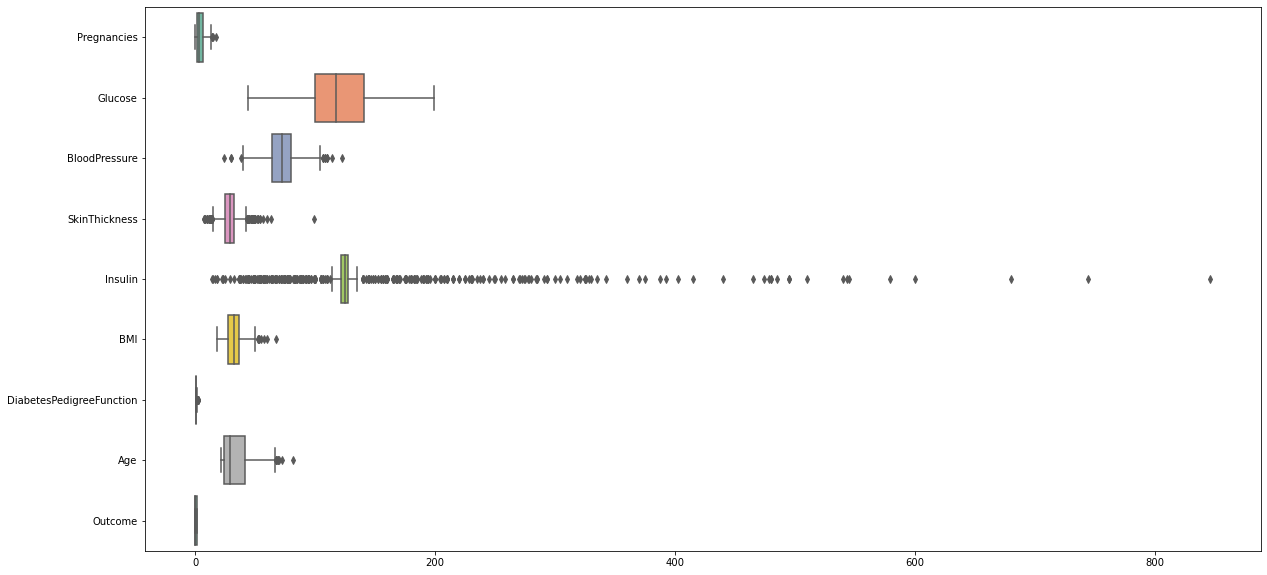

In [41]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_copy, orient="h", palette="Set2")
plt.show()

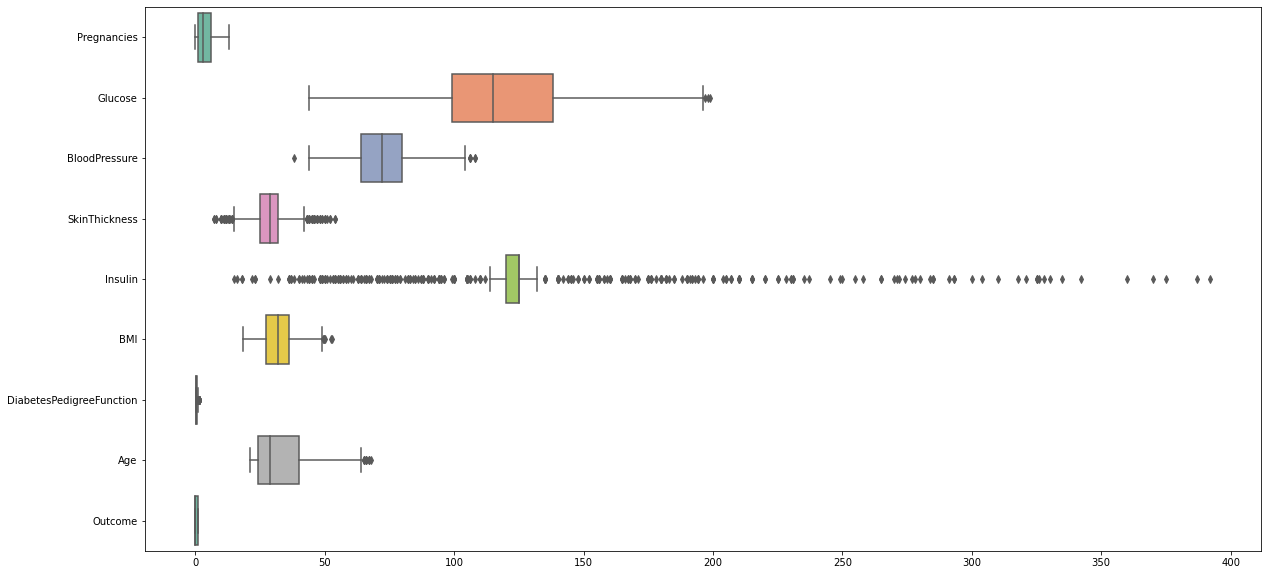

In [42]:
#remove outliers witz z-score
from scipy import stats

def remove_outliers_zscore(data, threshold=3):
    z_scores = stats.zscore(data)
    filtered_data = data[(np.abs(z_scores) < threshold).all(axis=1)]
    return filtered_data

df_z = remove_outliers_zscore(df_copy)

plt.figure(figsize=(20, 10))
sns.boxplot(data=df_z, orient="h", palette="Set2")
plt.show()

In [43]:
X = df_z.iloc[:,0:8]  #independent columns
y = df_z.iloc[:,-1]    #target column i.e price range
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=500)

print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

params = trial.params

optuna_xgb_z = XGBClassifier(**params)
optuna_xgb_z.fit(x_train, y_train)

[I 2023-07-09 22:05:13,896] A new study created in memory with name: no-name-b421c688-d18d-4b06-bcfd-a88ae5fa8e16
[I 2023-07-09 22:05:14,195] Trial 0 finished with value: 0.5 and parameters: {'n_estimators': 420, 'max_depth': 6, 'learning_rate': 0.38987527397346544, 'min_child_weight': 9, 'gamma': 0.0006177776694203127, 'subsample': 0.040663253261295315, 'colsample_bytree': 0.3651762727743712, 'reg_alpha': 0.062032031548785796, 'reg_lambda': 3.5722109476266475e-08}. Best is trial 0 with value: 0.5.
[I 2023-07-09 22:05:14,301] Trial 1 finished with value: 0.7479710462820794 and parameters: {'n_estimators': 94, 'max_depth': 8, 'learning_rate': 0.7249112586435047, 'min_child_weight': 9, 'gamma': 0.9630862289186913, 'subsample': 0.3372722624281232, 'colsample_bytree': 0.012740688551142456, 'reg_alpha': 0.00652140974352126, 'reg_lambda': 1.5686087106065405e-05}. Best is trial 1 with value: 0.7479710462820794.
[I 2023-07-09 22:05:14,541] Trial 2 finished with value: 0.70026321561746 and para

Number of finished trials: 500
Best trial:
  Value: 0.8156393946040797
  Params: 
    n_estimators: 313
    max_depth: 3
    learning_rate: 0.8216635870521117
    min_child_weight: 9
    gamma: 0.0002643508860065729
    subsample: 0.2617490473355645
    colsample_bytree: 0.0119212999975553
    reg_alpha: 2.0916465526015672e-07
    reg_lambda: 0.00011396059366053227
[22:08:16] WARNING: C:\Users\dev-admin\croot\xgboost-split_1675120659361\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.0119212999975553,
              enable_categorical=False, gamma=0.0002643508860065729, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.8216635870521117, max_delta_step=0, max_depth=3,
              min_child_weight=9, missing=nan, monotone_constraints='()',
              n_estimators=313, n_jobs=12, num_parallel_tree=1,
              predictor='auto', random_state=0,
              reg_alpha=2.0916465526015672e-07,
              reg_lambda=0.00011396059366053227, scale_pos_weight=1,
              subsample=0.2617490473355645, tree_method='exact',
              validate_parameters=1, verbosity=None)

              precision    recall  f1-score   support

           0       0.88      0.89      0.88        97
           1       0.76      0.74      0.75        47

    accuracy                           0.84       144
   macro avg       0.82      0.82      0.82       144
weighted avg       0.84      0.84      0.84       144



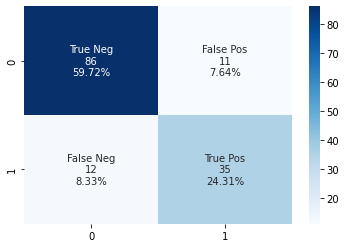

In [44]:
model_evaluation(optuna_xgb_z, x_test, y_test)

[22:08:16] WARNING: C:\Users\dev-admin\croot\xgboost-split_1675120659361\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:08:17] WARNING: C:\Users\dev-admin\croot\xgboost-split_1675120659361\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:08:17] WARNING: C:\Users\dev-admin\croot\xgboost-split_1675120659361\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:08:17] WARNING: C:\Users\dev-admin\croot\xgboost-split_1675120659361\work\s

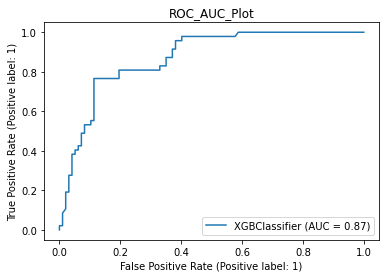

In [45]:
model(optuna_xgb_z,x_train,y_train,x_test,y_test)

In [49]:
import pickle as pkl

pkl.dump(optuna_xgb, open("model.pkl", "wb"))

pkl.dump(X, open("df.pkl", "wb"))